In [78]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import LineString, Polygon, Point, MultiPoint
import math
import operator
from functools import reduce


# Test data
length = 100
width = 80
x = [0,0,width,width,0]
y = [0,100,90,10,0]

IWB = 15

# def PolyArea(x,y):
#     coords = list(zip(x, y))
#     if len(x) >= 4:
#         center = tuple(map(operator.truediv, reduce(lambda x, y: map(operator.add, x, y), coords), [len(coords)] * 2)) # find center
#         sorted_coords = sorted(coords, key=lambda coord: (-135 - math.degrees(math.atan2(*tuple(map(operator.sub, coord, center))[::-1]))) % 360) # arrange clockwise
#         # print(sorted_coords)
#         shape = Polygon(sorted_coords)
#         # print("Area of Polygon:", shape.area)
#     return shape.area

def SortPolyPoints(x,y):
    coords = list(zip(x, y))
    if len(x) >= 4:
        center = tuple(map(operator.truediv, reduce(lambda x, y: map(operator.add, x, y), coords), [len(coords)] * 2)) # find center
        sorted_coords = sorted(coords, key=lambda coord: (-135 - math.degrees(math.atan2(*tuple(map(operator.sub, coord, center))[::-1]))) % 360) # arrange clockwise
    return Polygon(sorted_coords)






width_complete = 0
p1 = Point(0,length)
p2 = Point(0,0)

# Make list of each set of coords for polygon segments
poly_subs = []

# init inner points
inner = MultiPoint([(0, 0), (0, length)])


while width_complete <= width:
    

    first_line = LineString(np.column_stack((x, y)))
    second_line = LineString(np.column_stack(([IWB+width_complete,IWB+width_complete], [length,0])))
    intersection = first_line.intersection(second_line)
    print("intersection:", intersection)
    print(type(intersection))
    # add intersection points to polygon
    # print("inner points:")
    print(list(inner.geoms))
    # print("intersection points:")
    
    try:
        print(list(intersection.geoms))
        point_list = [
            list(inner.geoms)[0],
            list(inner.geoms)[1],
            list(intersection.geoms)[0],
            list(intersection.geoms)[1]
            ]
        print("list of points:")
        print(point_list)
        inner = MultiPoint(list(intersection.geoms))
    except:
        print(list(intersection.coords))
        try:
            point_list = [
                list(inner.geoms)[0],
                list(inner.geoms)[1],
                Point(list(intersection.coords)[0]),
                Point(list(intersection.coords)[1])
                ]
        except:
            # TODO: inner plus and points outside of current width. Subset initial points.
            print("Test")
            outer_edge = [(i,j) for (i,j) in zip(x,y) if i >= width_complete]
            print(outer_edge)
            point_list = [
                list(inner.geoms)[0],
                list(inner.geoms)[1],
                Point(outer_edge[0]),
                Point(outer_edge[1])
            ]
        print("list of points:")
        print(point_list)
        # inner = MultiPoint(list(intersection.coords))
    
    # define sub poly
    poly = SortPolyPoints([p.x for p in point_list],[p.y for p in point_list])
    poly_subs.append(poly)
    print("area:")
    print(poly.area)
    

    width_complete += IWB

print(poly_subs)


intersection: MULTIPOINT ((15 1.875), (15 98.125))
<class 'shapely.geometry.multipoint.MultiPoint'>
[<POINT (0 0)>, <POINT (0 100)>]
[<POINT (15 1.875)>, <POINT (15 98.125)>]
list of points:
[<POINT (0 0)>, <POINT (0 100)>, <POINT (15 1.875)>, <POINT (15 98.125)>]
area:
1471.875
intersection: MULTIPOINT ((30 3.75), (30 96.25))
<class 'shapely.geometry.multipoint.MultiPoint'>
[<POINT (15 1.875)>, <POINT (15 98.125)>]
[<POINT (30 3.75)>, <POINT (30 96.25)>]
list of points:
[<POINT (15 1.875)>, <POINT (15 98.125)>, <POINT (30 3.75)>, <POINT (30 96.25)>]
area:
1415.625
intersection: MULTIPOINT ((45 5.625), (45 94.375))
<class 'shapely.geometry.multipoint.MultiPoint'>
[<POINT (30 3.75)>, <POINT (30 96.25)>]
[<POINT (45 5.625)>, <POINT (45 94.375)>]
list of points:
[<POINT (30 3.75)>, <POINT (30 96.25)>, <POINT (45 5.625)>, <POINT (45 94.375)>]
area:
1359.375
intersection: MULTIPOINT ((60 7.5), (60 92.5))
<class 'shapely.geometry.multipoint.MultiPoint'>
[<POINT (45 5.625)>, <POINT (45 94.375

In [125]:
# Import libraries
import numpy as np
import plotly.graph_objects as go
import ipywidgets as widgets

design_x = [0,0,width,width,0]
design_y = [0,100,90,10,0]
init_max_dim = 250 # equal height and width, can be optimised for performance
init_height = init_max_dim
init_width = init_max_dim
points_vert = int(init_height * (4/5) + 1)
points_hor = int(init_width * (4/5) + 1)

fig=go.FigureWidget([
    go.Scatter(x=np.repeat(np.linspace(0, init_width/2, points_hor), points_hor),
               y=np.tile(np.linspace(init_height, 0, points_vert), points_vert),
               mode='markers'),
    go.Scatter(x=[], y=[], mode="lines")
    ])


scatter=fig.data[0]
line = fig.data[1]
scatter.marker.color="rgba(0,0,0,0)"
scatter.marker.size=0
fig.layout.hovermode='closest'
fig.add_vline(x=0, line_width=3, line_dash="dash", line_color="grey")
fig.update(layout_showlegend=False)

out = widgets.Output(layout={'border': '1px solid black'})
out.append_stdout('Output appended with append_stdout\n')

# create our callback function
@out.capture()
def update_point(trace, points, selector):
    x = list(line.x) + points.xs
    y = list(line.y) + points.ys
    line.update(x=x, y=y)
scatter.on_click(update_point)

reset = widgets.Button(description="Reset")
export = widgets.Button(description="Export")

@out.capture()
def on_reset_clicked(b):
    line.update(x=[], y=[])
    out.clear_output()
@out.capture()
def on_export_clicked(b):
    print(fig.to_dict()["data"][1])

reset.on_click(on_reset_clicked)
export.on_click(on_export_clicked)

widgets.VBox([widgets.HBox([reset, export]), widgets.VBox([fig, out])])
# widgets.VBox([widgets.VBox([fig, out])])

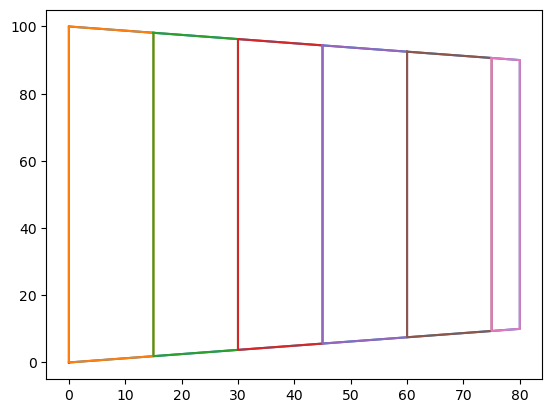

In [79]:
fig, ax = plt.subplots()
plt.plot(x,y)

for poly in poly_subs:
    x, y = poly.exterior.xy
    ax.plot(x, y)
plt.show()
